Wi-Fi 신호로 현재위치 및 빌딩 추측
=====

- ### 분석자: 박지훈
- ### 분석기간: 2018.05.10
- ### 사용자료: UJIIndoorLoc Data Set
- ### 자료출처: UCL Machine Learning Repository(https://archive.ics.uci.edu/ml/datasets/ujiindoorloc)
- ### 분석방법: Regression, K-Neighbors Regression, Neural Network

---

In [4]:
# import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import *
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
from sklearn.preprocessing import normalize

---

In [5]:
# data read
raw_train = pd.read_csv("trainingData.csv")
raw_validation = pd.read_csv("validationData.csv")

### DATA Dict

|번호|<center>구분|<center>칼럼명|<center>설명|<center>범위|
|----|----|--------------|------------|------------|
|<center>1|<center>Integer|<center>WAP001 ~ WAP520|WAP001부터 WAP520까지의 신호세기<br><center>신호가 없을시 100, 가장강한신호 -104|<center>-104 ~ 100|
|<center>2|<center>Real|<center>LONGITUDE|<center>관측 경도|<center>-7691.3384 ~ -7300.81899009|
|<center>3|<center>Real|<center>LATITUDE|<center>관측 위도|<center>4864745.74502 ~ 4865016.6878|
|<center>4|Categorical Integer|<center>FLOOR|<center>층 수|<center>0, 1, 2, 3, 4|
|<center>5|Categorical Integer|<center>BUILDING|<center>빌딩 ID|<center>0, 1, 2|
|<center>6|Categorical Integer|<center>SPACEID|<center>방 ID|<center>1:18, 22, 25:30, 101:147, 201:250, 253, 254|
|<center>7|Categorical Integer|<center>RELATIVEPOSITION|<center>공간에 대한 상대적 위치|<center>1: 실내, 2: 실외|
|<center>8|Categorical Integer|<center>USERID|<center>기록자 식별코드(기록자의 신장)|<center>0 ~ 18|
|<center>9|Categorical Integer|<center>PHONEID|<center>안드로이드 기기 식별코드|<center>0 ~ 24|
|<center>10|<center>Integer|<center>TIMESTAMP|<center>좌표가 기록된 UNIX시간|<center>1369908924 ~ 1371737745|

### EDA

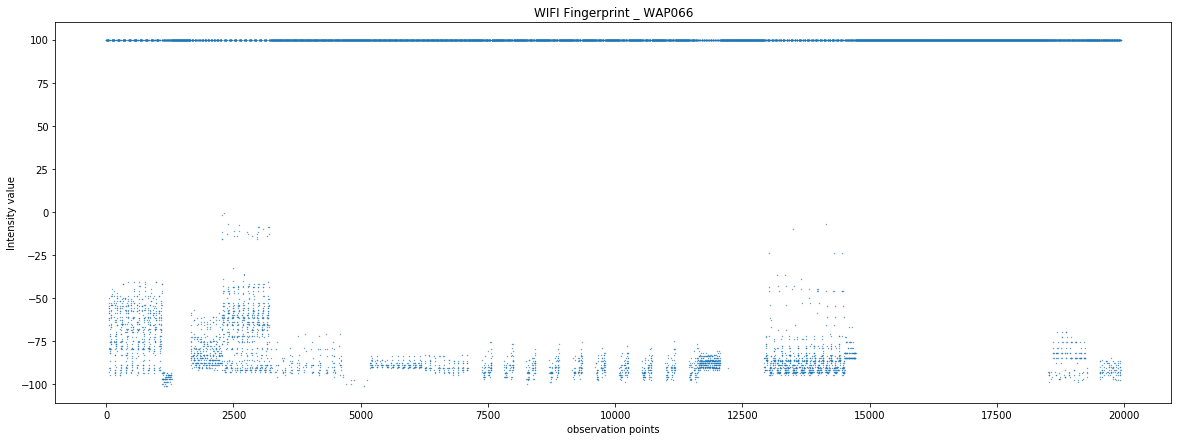

In [7]:
select = raw_train.iloc[:, np.random.randint(0, np.size(raw_train, axis=1)-9)]
plt.figure(figsize=(20, 7))
plt.scatter(x=raw_train.index, y=select, s=0.1)
plt.xlabel("observation points")
plt.ylabel("Intensity value")
plt.title("WIFI Fingerprint" + " _ " + select.name)
plt.show()

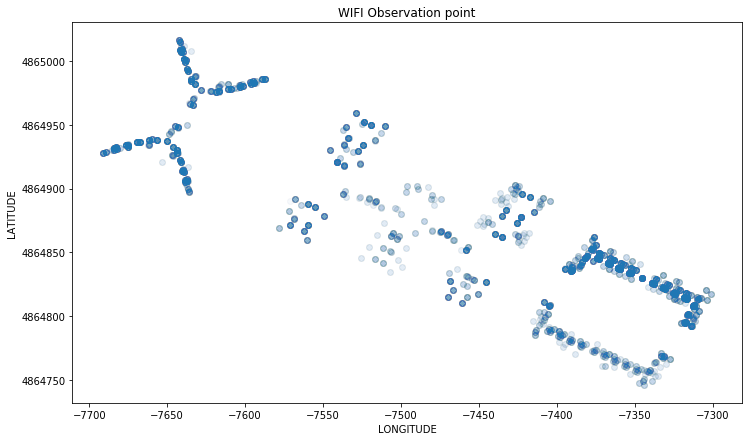

In [8]:
plt.figure(figsize=(12, 7))
plt.scatter(x=raw_train.LONGITUDE, y=raw_train.LATITUDE, alpha=0.01)
plt.xlabel("LONGITUDE")
plt.ylabel("LATITUDE")
plt.title("WIFI Observation point")
plt.show()

### Preprocessing